Import Libraries:

In [14]:
import pandas as pd #data analysis & manupulation
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visuallize
import seaborn as sns # data visualize
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

Load Data files

In [15]:
df = pd.read_csv("/content/sample_data/netflix_titles.csv")
df["date_added"]=pd.to_datetime(df["date_added"].str.strip(), errors='coerce')
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


Explore Data

In [16]:
print(df.columns)
df.describe()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


,date_added,release_year
count,8797,8807.000000
mean,2019-05-17 05:59:08.436967168,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-02 00:00:00,2017.000000
75%,2020-08-19 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


Top 10 Countries

In [17]:
df_countries = df['country'].dropna().str.split(',').explode().str.strip()
top_10_countries = df_countries.value_counts().head(10)

Filter Top Countries & Split Genres

In [18]:
top_countries_list = top_10_countries.index.tolist()
df_top_countries = df[df['country'].notna()]
df_top_countries = df_top_countries.assign(country=df_top_countries['country'].str.split(',')).explode('country')
df_top_countries['country'] = df_top_countries['country'].str.strip()
df_top_countries = df_top_countries[df_top_countries['country'].isin(top_countries_list)]
# Spliting genres into rows
df_top_countries = df_top_countries.assign(genre=df_top_countries['listed_in'].str.split(',')).explode('genre')
df_top_countries['genre'] = df_top_countries['genre'].str.strip()

Count Movies and TV Shows

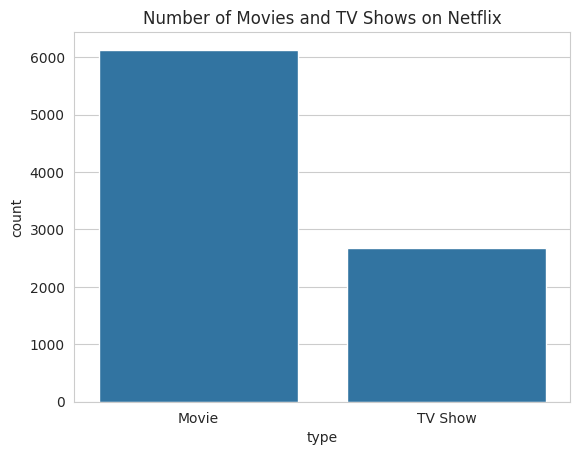

In [19]:
df["type"].value_counts()
df["country"].value_counts().head(10)
sns.countplot(x="type",data=df)
plt.title("Number of Movies and TV Shows on Netflix")
plt.show()

Titles Added Over Time

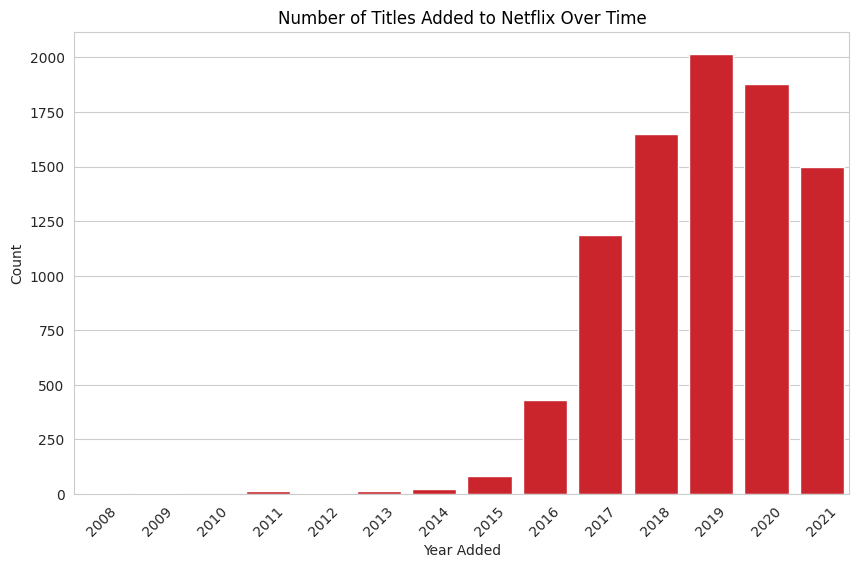

In [20]:
df["year_added"]=df["date_added"].dt.year.astype("Int64")
netflix_red="#E50914" #try to make the lines colour as red as netflix
plt.figure(figsize=(10,6))
order=sorted(df["year_added"].dropna().unique())
sns.countplot(x="year_added",data=df,order=order,color=netflix_red)
plt.title("Number of Titles Added to Netflix Over Time",color="black")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Top 10 Countries Bar Chart

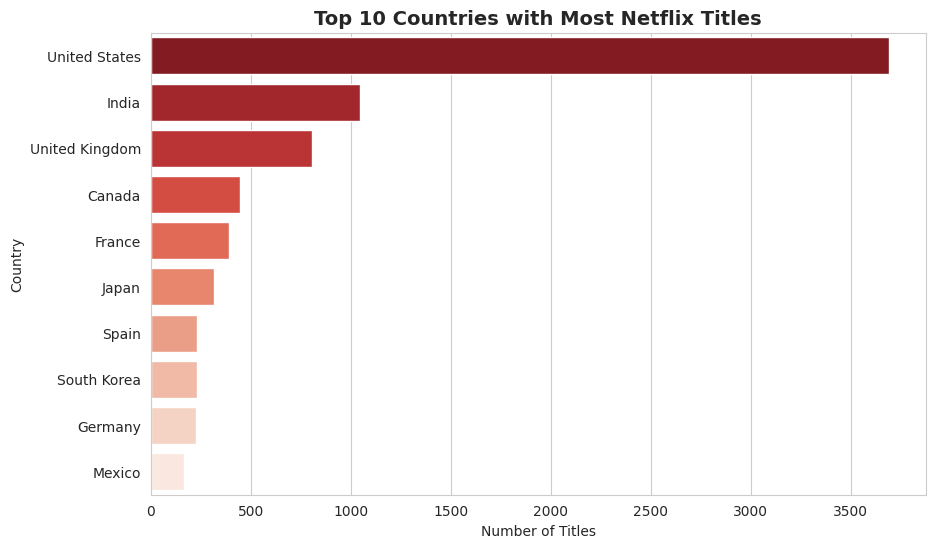

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette="Reds_r")
plt.title("Top 10 Countries with Most Netflix Titles", fontsize=14, fontweight='bold')
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

Top 3 Genres Pie Charts in top ten Countries

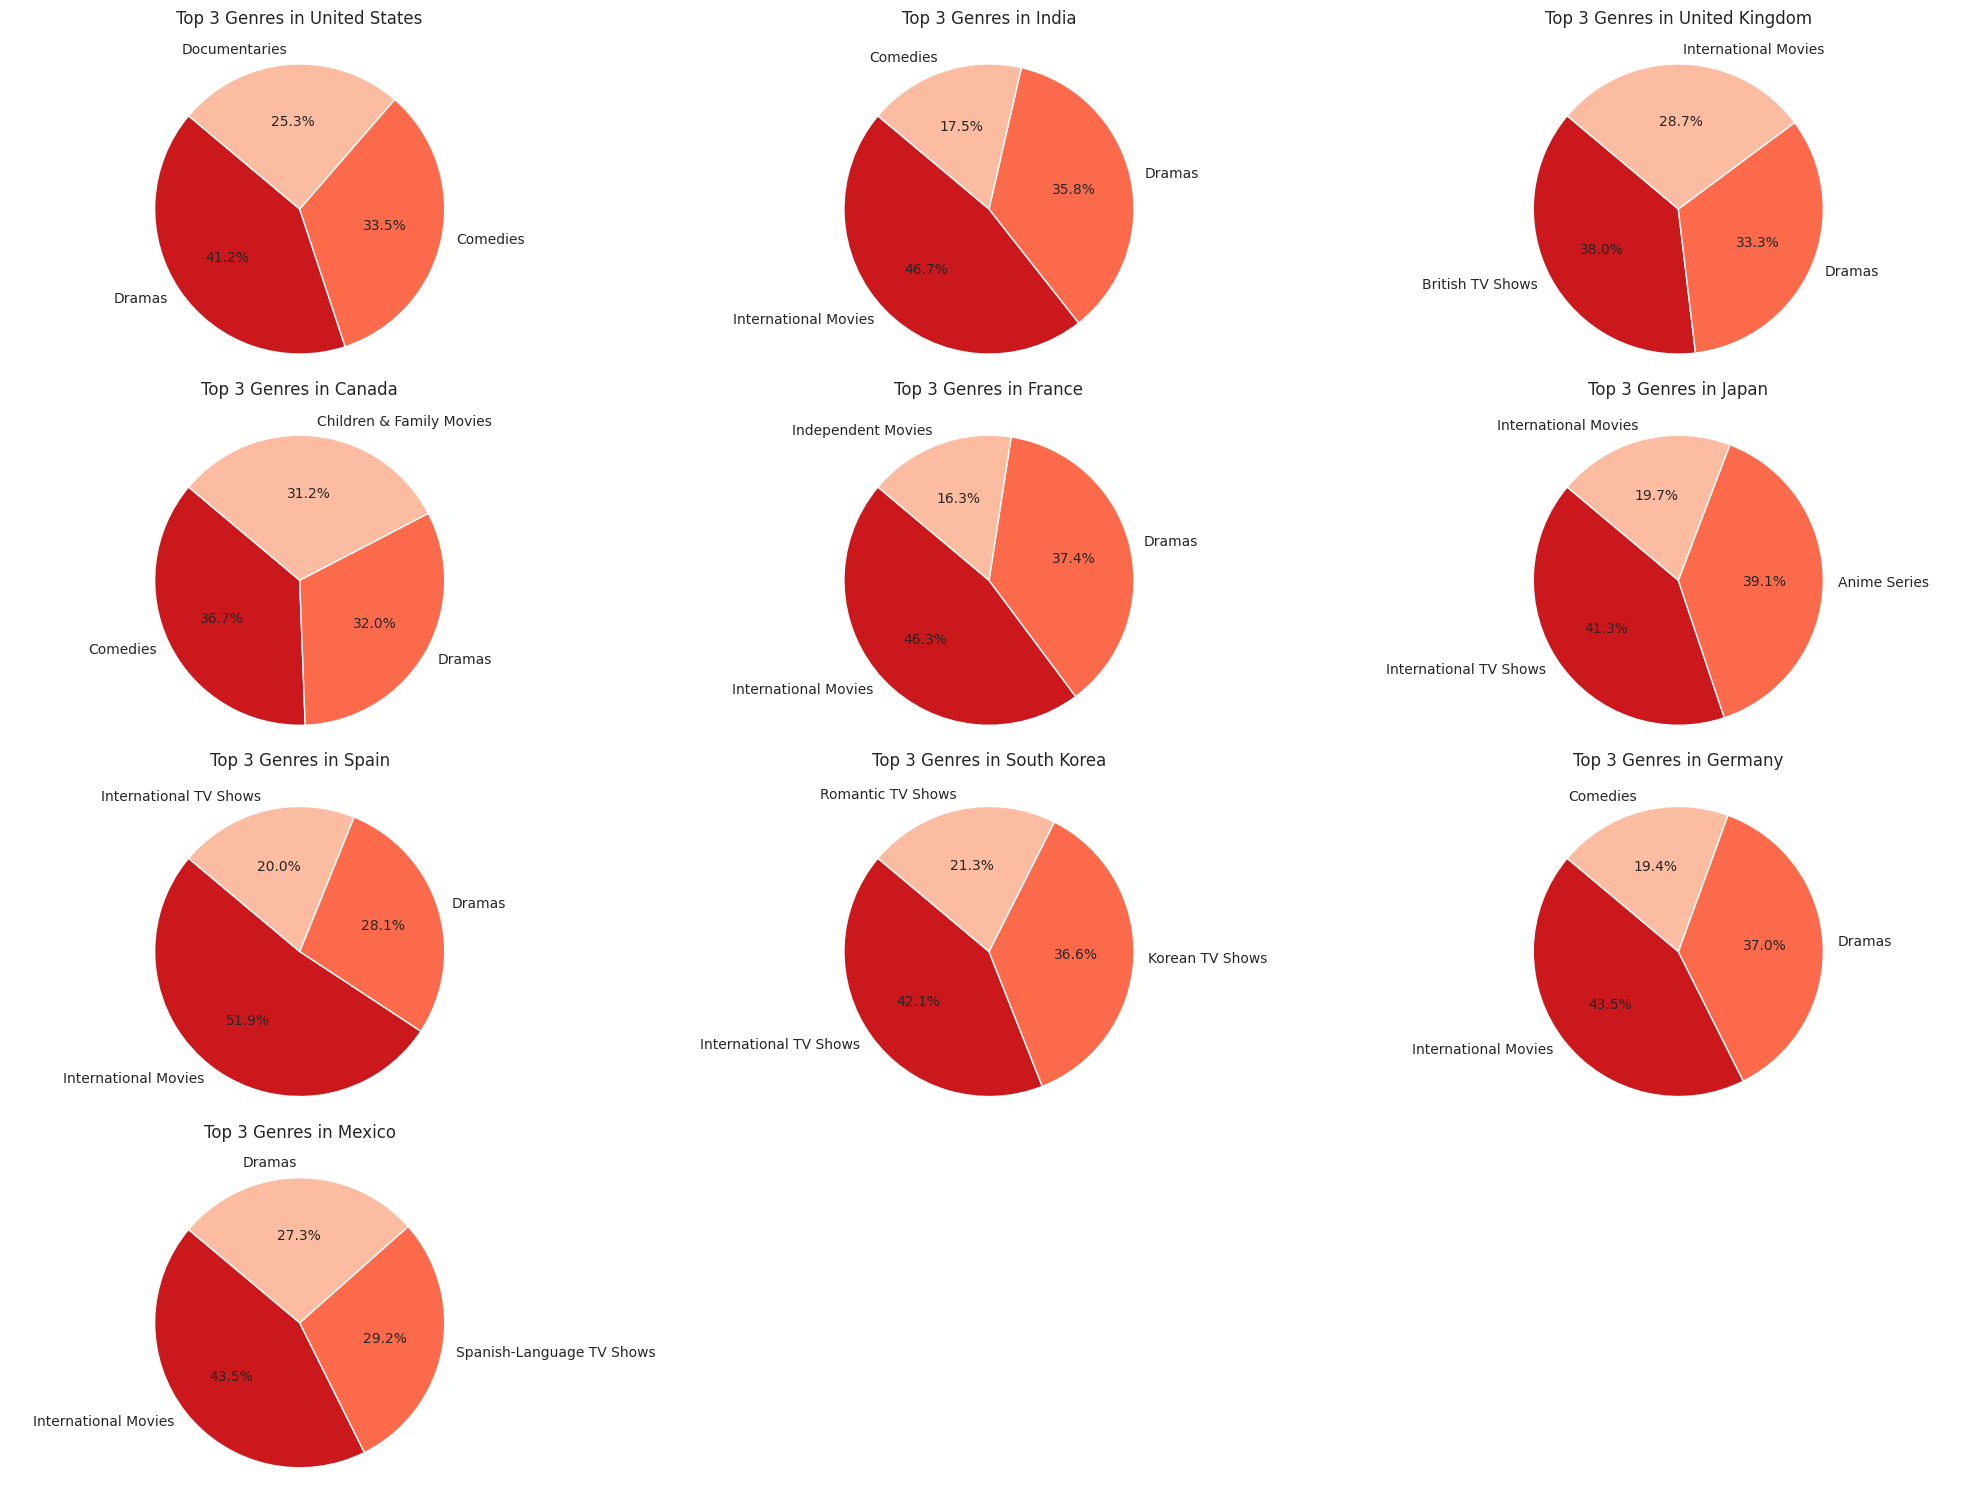

In [22]:
plt.figure(figsize=(20,15))
for i, country in enumerate(top_countries_list):
    plt.subplot(4, 3, i+1)
    # Filter for this country
    df_country = df_top_countries[df_top_countries['country'] == country]
    # Get top 3 genres
    top_genres = df_country['genre'].value_counts().head(3)
    plt.pie(top_genres.values, labels=top_genres.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette("Reds_r", len(top_genres)))
    plt.title(f"Top 3 Genres in {country}", fontsize=12, pad=20)
    plt.axis('equal')
plt.tight_layout()
plt.show()